<a href="https://colab.research.google.com/github/carson-edmonds/Loan_Default_Classification/blob/main/CEdmonds_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Loading the required libraries
import pandas as pd # Pandas for data manipulation
import seaborn as sns # Seaborn for visualizing. Note: we will also use one of the data sets
import matplotlib.pyplot as plt # Matplotlib for subplots
%matplotlib inline

from sklearn import tree # Import Tree Classifiers
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifiers
from sklearn.model_selection import train_test_split,  RandomizedSearchCV # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from scipy.stats import randint # Generate random numbers

In [ ]:
#@title Mounting your Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Loading data and viewing it

train_data = pd.read_csv('/content/drive/MyDrive/AAI 510/data/application_train.csv')
train_shap = train_data.shape
print("Shape of the dataframe (row, col):",train_shap,"\r\n")

# Show dataframe
train_data

Shape of the dataframe (row, col): (307511, 122) 



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
#@title Loading test data and viewing it

test_data = pd.read_csv('/content/drive/MyDrive/AAI 510/data/application_test.csv')
test_shap = test_data.shape
print("Shape of the dataframe (row, col):",test_shap,"\r\n")

# Show dataframe
test_data

Shape of the dataframe (row, col): (48744, 121) 



,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Marr

In [ ]:
#Encoding Name contract type using get_dummies
train_data = pd.get_dummies(train_data, columns=['NAME_CONTRACT_TYPE'], drop_first=True)

#Encoding gender using get_dummies
train_data = pd.get_dummies(train_data, columns=['CODE_GENDER'], drop_first=True)

#Encoding car and realty using get_dummies
train_data = pd.get_dummies(train_data, columns=['FLAG_OWN_CAR'], drop_first=True)
train_data = pd.get_dummies(train_data, columns=['FLAG_OWN_REALTY'], drop_first=True)
train_data = pd.get_dummies(train_data, columns=['EMERGENCYSTATE_MODE'], drop_first=True)
print(train_data.head())

   SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      24700.5         351000.0   Unaccompanied          Working   
1      35698.5        1129500.0          Family    State servant   
2       6750.0         135000.0   Unaccompanied          Working   
3      29686.5         297000.0   Unaccompanied          Working   
4      21865.5         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher

In [ ]:
# Performing LabelEncoding for remaining all categorical features
from sklearn.preprocessing import OrdinalEncoder
ordinalencoder = OrdinalEncoder()
train_data[['NAME_TYPE_SUITE']] = ordinalencoder.fit_transform(train_data[['NAME_TYPE_SUITE']])
train_data[['NAME_INCOME_TYPE']] = ordinalencoder.fit_transform(train_data[['NAME_INCOME_TYPE']])
train_data[['NAME_EDUCATION_TYPE']] = ordinalencoder.fit_transform(train_data[['NAME_EDUCATION_TYPE']])
train_data[['NAME_FAMILY_STATUS']] = ordinalencoder.fit_transform(train_data[['NAME_FAMILY_STATUS']])
train_data[['NAME_HOUSING_TYPE']] = ordinalencoder.fit_transform(train_data[['NAME_HOUSING_TYPE']])
train_data[['OCCUPATION_TYPE']] = ordinalencoder.fit_transform(train_data[['OCCUPATION_TYPE']])
train_data[['WEEKDAY_APPR_PROCESS_START']] = ordinalencoder.fit_transform(train_data[['WEEKDAY_APPR_PROCESS_START']])
train_data[['ORGANIZATION_TYPE']] = ordinalencoder.fit_transform(train_data[['ORGANIZATION_TYPE']])
train_data[['FONDKAPREMONT_MODE']] = ordinalencoder.fit_transform(train_data[['FONDKAPREMONT_MODE']])
train_data[['HOUSETYPE_MODE']] = ordinalencoder.fit_transform(train_data[['HOUSETYPE_MODE']])
train_data[['WALLSMATERIAL_MODE']] = ordinalencoder.fit_transform(train_data[['WALLSMATERIAL_MODE']])

In [ ]:
#@title Replace NULL values
#train_data.dtypes
#train_data.info()
train_data.isnull().sum()

# Replacing null values with most frequent value
#Repalce inplace
train_data.fillna(0,inplace=True)
train_data.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
                          ..
CODE_GENDER_M              0
CODE_GENDER_XNA            0
FLAG_OWN_CAR_Y             0
FLAG_OWN_REALTY_Y          0
EMERGENCYSTATE_MODE_Yes    0
Length: 123, dtype: int64

In [ ]:
pd.set_option('display.max_columns', 123)
train_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,6.0,7.0,4.0,3.0,1.0,0.018801,-9461,-637,-3648.0,-2120,0.0,1,1,0,1,1,0,8.0,1.0,2,2,6.0,10,0,0,0,0,0,0,5.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,2.0,0.0,0.0149,5.0,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,1.0,4.0,1.0,1.0,1.0,0.003541,-16765,-1188,-1186.0,-291,0.0,1,1,0,1,1,0,3.0,2.0,1,1,1.0,11,0,0,0,0,0,0,39.0,0.311267,0.622246,0.000000,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,2.0,0.0,0.0714,0.0,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,6.0,7.0,4.0,3.0,1.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,8.0,1.0,2,2,1.0,9,0,0,0,0,0,0,11.0,0.000000,0.555912,0.729567,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1,1,0
3,100006,0,0,1

In [ ]:
#@title My Top Ten:
my_top_ten = train_data[['TARGET','AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y']].copy()

In [ ]:
#@title Designating target and features
y_ten = my_top_ten.TARGET # Target variable
x_ten = my_top_ten.drop(columns=['TARGET']) # Features by dropping the target column

In [ ]:
#@title Designating target and features
y = train_data.TARGET # Target variable
x = train_data.drop(columns=['TARGET']) # Features by dropping the target column

In [ ]:
#@title Splitting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
#@title Splitting dataset into training set and test set
X_train_ten, X_test_ten, y_train_ten, y_test_ten = train_test_split(x_ten, y_ten, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
#build tree
#@title Building the Decision Tree with My Top Ten
clf = tree.DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train_ten, y_train_ten) # Train Decision Tree Classifer

In [ ]:
#compute accuracy
#@title Evaluating the Tree model
y_hat = clf.predict(X_train_ten) # Predict the response for train dataset

y_pred = clf.predict(X_test_ten) # Predict the response for test dataset

# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train_ten, y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test_ten, y_pred))

Train Accuracy: 0.9991359166020153
Test Accuracy: 0.8447655386216316


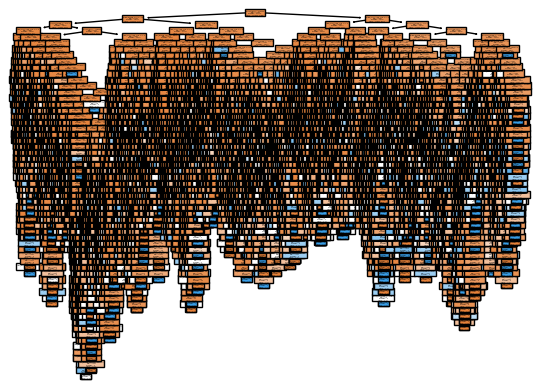

In [ ]:
#@title Visualizing the Tree

f_names=list(x_ten.columns) # Feature names
tree.plot_tree(clf, filled=True, feature_names=f_names) # Plot the tree
plt.show() # Show without the rules in plain text

In [ ]:
#random forest
#@title Building the Random Forest
rf = RandomForestClassifier(random_state=0) # Create Fandom Forest classifer object
rf = rf.fit(X_train, y_train) # Train Random Forest Classifer

In [ ]:
#@title Evaluating the RF model
y_hat = rf.predict(X_train) # Predict the response for train dataset

y_pred = rf.predict(X_test) # Predict the response for test dataset

# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
rf.feature_importances_

In [ ]:
#plt.barh(X_train.columns, rf.feature_importances_)
sorted_idx = rf.feature_importances_.argsort()
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 20))

sns.barplot(x=rf.feature_importances_[sorted_idx], y=X_train.columns[sorted_idx], orient='h')

#add plot title
plt.title('Feature Importance', fontsize=16)

#add axis labels
plt.xlabel('Importance')
plt.ylabel('Feature')

In [ ]:
#tree with new variables
#@title New Top Ten:
new_top_ten = train_data[['TARGET','EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'SK_ID_CURR', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT']].copy()

In [ ]:
#@title Designating target and features
y_new = new_top_ten.TARGET # Target variable
x_new = new_top_ten.drop(columns=['TARGET']) # Features by dropping the target column

In [ ]:
#@title Splitting dataset into training set and test set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
#@title Building the Decision Tree with New Top Ten
clf2 = tree.DecisionTreeClassifier() # Create Decision Tree classifer object
clf2 = clf2.fit(X_train_new, y_train_new) # Train Decision Tree Classifer

In [ ]:
#compute accuracy
#@title Evaluating the New Top Ten Tree model
y_hat = clf2.predict(X_train_new) # Predict the response for train dataset

y_pred = clf2.predict(X_test_new) # Predict the response for test dataset

# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train_new, y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test_new, y_pred))

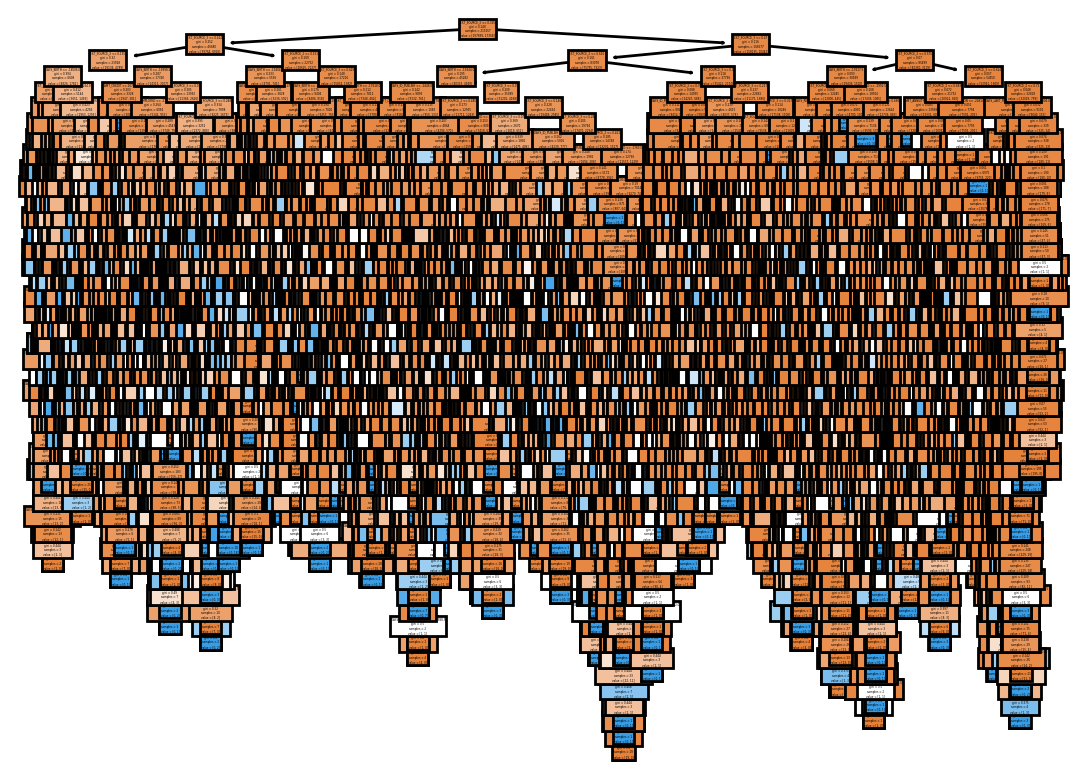

In [ ]:
#@title Visualizing the New Tree

f_names=list(x_new.columns) # Feature names
tree.plot_tree(clf2, filled=True, feature_names=f_names) # Plot the tree
plt.show() # Show without the rules in plain text

In [ ]:
#@title Compare the Top Ten Features (My Top Ten and the New Top Ten)

To start the features listed for my initial Top Ten had to be modified as I didn't select them correctly the first time. So my new list is: 'TARGET','AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y'. I added income type as it would be valuable to have further information into where the income is coming from. This could have insights into if it will still be coming when payments are due. I also added education. I did so because I think that credibility of someone is often improved as their education improves. Whether or not it should is another story but I think psycologically we would associate someone with a PhD as being smarter and more responsible than a high school graduate and thus more likely to pay us back on the loan. I also added occupation type, again just where is the income coming from.

In the new list we see these features: 'TARGET','EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'SK_ID_CURR', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT. The only similarities are in the Days birth adn employed. I think part of the reason for differences is the cardinality of some of these such as SK_ID_CURR. This would be full of unique numbers and I think that the importance is biased to these with the standard calculation. In the future accounting for these cases may change the feature importance rankings.

Looking at the accuracy on the test and train data we see that the train accuracy for my top ten was 99% where the new top ten was 100%. The test accuracy was 84.5% and 85.0% respectively. This would indicate that the new top ten is performing slightly better but more data would be helpful in determining this. Based on the information I have, I could say the improved performance is due to how it is using these features to predict the target. It may be that due to the uniqueness of these features there are more ways to divide the clients up and thus get more specific with predictions allowing for better accuracy. I think determining other ways of analyzing this would be a valuable way to say more.

Side note, the rf did quite well on the test data, supporting the idea that ensemble methods perform better.